In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import r2_score


In [55]:
df=pd.read_csv(r'/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [57]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()
category=['Country']

feature=df[category]
encoder.fit(feature)

df[category] = pd.DataFrame(encoder.transform(feature))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Fever                    316800 non-null  int64  
 1   Tiredness                316800 non-null  int64  
 2   Dry-Cough                316800 non-null  int64  
 3   Difficulty-in-Breathing  316800 non-null  int64  
 4   Sore-Throat              316800 non-null  int64  
 5   None_Sympton             316800 non-null  int64  
 6   Pains                    316800 non-null  int64  
 7   Nasal-Congestion         316800 non-null  int64  
 8   Runny-Nose               316800 non-null  int64  
 9   Diarrhea                 316800 non-null  int64  
 10  None_Experiencing        316800 non-null  int64  
 11  Age_0-9                  316800 non-null  int64  
 12  Age_10-19                316800 non-null  int64  
 13  Age_20-24                316800 non-null  int64  
 14  Age_

In [59]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [60]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795    False
316796    False
316797    False
316798    False
316799    False
Length: 316800, dtype: bool

In [61]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,4.500000
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405,2.872286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [63]:
df['target']=df['Severity_Severe']

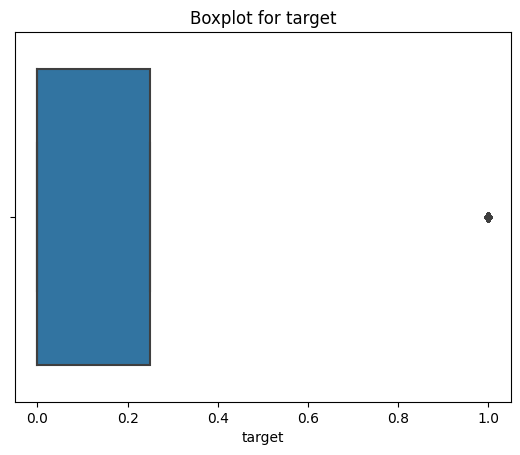

In [64]:
sns.boxplot(x=df['target'])
plt.title("Boxplot for target")
plt.show()

In [65]:
Q1 = df['target'].quantile(0.25)
Q3 = df['target'].quantile(0.75)


IQR = Q3-Q1
IQR

0.25

In [66]:
outliers = df[(df['target']<Q1 - 1.5*IQR)|(df['target'] >Q3+1.5*IQR)]

In [67]:
df_clean = df[(df['target']>=Q1 - 1.5*IQR)&(df['target'] <=Q3+1.5*IQR)]

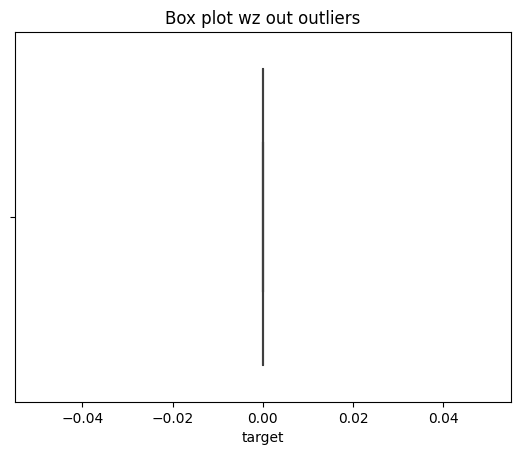

In [68]:
sns.boxplot(x = df_clean['target'])
plt.title('Box plot wz out outliers')
plt.show()

In [70]:
# To make the report more organized

def train_model(model, x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)

    print('Classification Report for TRAIN DATA')
    print('--'*10)
    print(classification_report(y_train,train_pred))
    print('=='*20)
    print('Classification Report for TEST DATA')
    print('--'*10)
    print(classification_report(y_test,test_pred))

    cm_train = confusion_matrix(y_train,train_pred)
    cm_test = confusion_matrix(y_test,test_pred)
    return cm_train,cm_test

In [71]:
x=df.drop(['target', 'Severity_Severe', 'Severity_Mild', 'Severity_Moderate', 'Severity_None'], axis=1)
y=df['target']


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
train_model(model, x_train,x_test,y_train,y_test)

Classification Report for TRAIN DATA
--------------------
              precision    recall  f1-score   support

           0       0.75      0.98      0.85    189959
           1       0.39      0.04      0.07     63481

    accuracy                           0.74    253440
   macro avg       0.57      0.51      0.46    253440
weighted avg       0.66      0.74      0.66    253440

Classification Report for TEST DATA
--------------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     47641
           1       0.03      0.01      0.01     15719

    accuracy                           0.69     63360
   macro avg       0.38      0.46      0.42     63360
weighted avg       0.56      0.69      0.62     63360



(array([[186203,   3756],
        [ 61070,   2411]]),
 array([[43828,  3813],
        [15607,   112]]))

In [ ]:
T_mod=DecisionTreeClassifier(criterion='entropy',max_depth=3)
T_mod.fit(x_train,y_train)

In [ ]:
plt.figure(figsize=(20,10)) 
tree = plot_tree(T_mod, filled=True, feature_names=df.columns)

plt.show()

In [ ]:
train_model(T_mod, x_train,x_test,y_train,y_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=2, random_state=7)
rf.fit(x_train,y_train)

In [ ]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

In [ ]:
print(accuracy_score(rf_pred_train,y_train))
print(accuracy_score(rf_pred_test,y_test))